In [1]:
import os
import numpy as np
import Cell_BLAST as cb
import utils
cb.config.RANDOM_SEED = 0
cb.config.N_JOBS = 4
fixed_model_kwargs = dict(
    latent_dim=10, cat_dim=20,
    epoch=500, patience=20
)

---

# Human

### Zheng

/home/weil/software/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


,cell_ontology_class,cell_ontology_id,cell_type1,dataset_name,organ,organism,platform
1-AAACATACATTCTC-1,hematopoietic precursor cell,CL:0008001,CD34+,Zheng,PBMC,Homo sapiens,10x
1-AAACATTGCGATAC-1,hematopoietic precursor cell,CL:0008001,CD34+,Zheng,PBMC,Homo sapiens,10x
1-AAACATTGCGTCTC-1,hematopoietic precursor cell,CL:0008001,CD34+,Zheng,PBMC,Homo sapiens,10x
1-AAACATTGGCCAAT-1,hematopoietic precursor cell,CL:0008001,CD34+,Zheng,PBMC,Homo sapiens,10x
1-AAACATTGGCCATA-1,hematopoietic precursor cell,CL:0008001,CD34+,Zheng,PBMC,Homo sapiens,10x


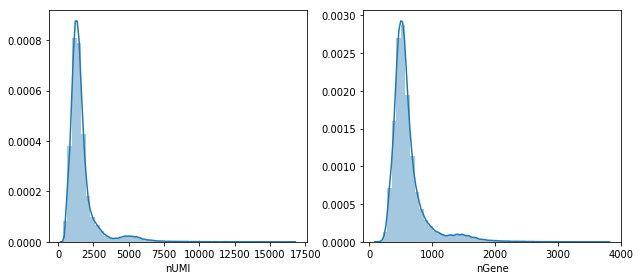

In [2]:
zheng = cb.data.ExprDataSet.read_dataset("../../Datasets/data/Zheng/data.h5")
utils.peek(zheng, "Zheng")
zheng = zheng.normalize()
zheng.obs.head()

In [3]:
opt_model_kwargs = dict(h_dim=512)
zheng_model = cb.directi.fit_DIRECTi(
    zheng, zheng.uns["seurat_genes"],
    **fixed_model_kwargs, **opt_model_kwargs,
    path="/tmp/cb/db/Zheng/model_0"
)
zheng.latent = zheng_model.inference(zheng)

[DIRECTi epoch 0] train=1.025, val=0.739, time elapsed=9.9s Best save...
[DIRECTi epoch 1] train=0.607, val=0.628, time elapsed=9.1s Best save...
[DIRECTi epoch 2] train=0.601, val=0.606, time elapsed=9.1s Best save...
[DIRECTi epoch 3] train=0.600, val=0.603, time elapsed=8.9s Best save...
[DIRECTi epoch 4] train=0.599, val=0.601, time elapsed=9.1s Best save...
[DIRECTi epoch 5] train=0.598, val=0.601, time elapsed=9.0s
[DIRECTi epoch 6] train=0.598, val=0.600, time elapsed=9.0s Best save...
[DIRECTi epoch 7] train=0.597, val=0.600, time elapsed=8.9s
[DIRECTi epoch 8] train=0.597, val=0.599, time elapsed=9.0s Best save...
[DIRECTi epoch 9] train=0.597, val=0.600, time elapsed=9.0s
[DIRECTi epoch 10] train=0.597, val=0.599, time elapsed=8.9s
[DIRECTi epoch 11] train=0.597, val=0.599, time elapsed=9.0s Best save...
[DIRECTi epoch 12] train=0.596, val=0.599, time elapsed=9.2s
[DIRECTi epoch 13] train=0.596, val=0.599, time elapsed=9.2s Best save...
[DIRECTi epoch 14] train=0.596, val=0.5

[  Info   ] Computing tSNE...


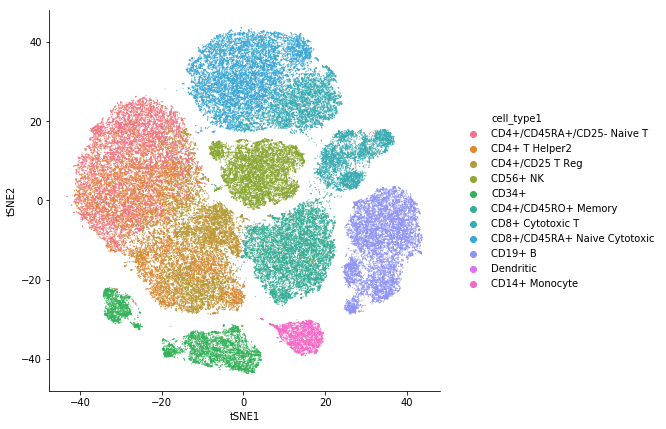

In [4]:
plot = zheng.visualize_latent("cell_type1", size=0.1)
plot.get_figure().savefig("Zheng/cell_type1.pdf", bbox_inches="tight")

[  Info   ] Using cached tSNE...


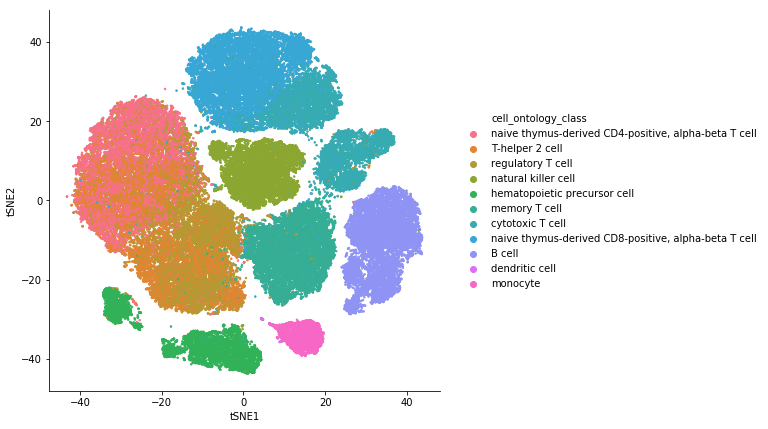

In [5]:
plot = zheng.visualize_latent("cell_ontology_class")
plot.get_figure().savefig("Zheng/cell_ontology_class.pdf", bbox_inches="tight")

In [6]:
%%capture capio
zheng_models = [zheng_model]
for i in range(1, cb.config.N_JOBS):
    print("==== Model %d ====" % i)
    zheng_models.append(cb.directi.fit_DIRECTi(
        zheng, zheng.uns["seurat_genes"],
        **fixed_model_kwargs, **opt_model_kwargs,
        random_seed=i, path="/tmp/cb/db/Zheng/model_%d" % i
    ))
zheng_blast = cb.blast.BLAST(zheng_models, zheng, keep_exprs=True).build_empirical()
zheng_blast.save("Zheng")

INFO:tensorflow:Restoring parameters from /tmp/cb/db/Zheng/model_1/checkpoint-69
INFO:tensorflow:Restoring parameters from /tmp/cb/db/Zheng/model_2/checkpoint-54
INFO:tensorflow:Restoring parameters from /tmp/cb/db/Zheng/model_3/checkpoint-79


In [7]:
with open("Zheng/stdout.txt", "w") as f:
    f.write(capio.stdout)
with open("Zheng/stderr.txt", "w") as f:
    f.write(capio.stderr)

In [8]:
utils.self_projection(zheng_blast, "Zheng")

[  Info   ] Projecting to latent space...
[  Info   ] Doing nearest neighbor search...
[  Info   ] Merging hits across models...
[  Info   ] Computing posterior distribution distances...
[  Info   ] Computing empirical p-values...


/home/weil/software/conda/lib/python3.6/site-packages/scipy/stats/stats.py:313: RuntimeWarning: divide by zero encountered in log
  log_a = np.log(a)


Coverage = 0.9377
Accuracy = 0.9027
